# Step 1: Load and Explore the Dataset


We'll begin with loading and exploring the dataset to understand its structure and key features. This will help us decide on the features to focus on for distribution modification and further analysis.

First, we'll load the dataset into a DataFrame, display the first few rows, and summarize its statistics to get an overview. We'll also check for any missing values and understand the data types of each column.

In [ ]:
import pandas as pd

In [ ]:
!pip install --upgrade gdown
import gdown

In [ ]:
# DOWNLOAD THE DATASET FROM GOOGLE DRIVE
file_id = "1T9Veoj904l3IwXFz-PxCEG4Q-wHgK2v9"  # Your dataset file ID
output_file = "dailyActivity_merged.csv"  # The file will be saved with this name

# Download the file
!gdown --id {file_id} -O {output_file}

########################################
# STEP 2: IMPORT LIBRARIES & LOAD DATA #
########################################

import pandas as pd

# Read the dataset
data = pd.read_csv(output_file)
print("✅ Dataset loaded successfully! Shape:", data.shape)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1T9Veoj904l3IwXFz-PxCEG4Q-wHgK2v9
To: /content/dailyActivity_merged.csv
100% 51.3k/51.3k [00:00<00:00, 51.3MB/s]
✅ Dataset loaded successfully! Shape: (457, 15)


In [ ]:
# Display the first few rows of the dataset
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

In [ ]:
# Display summary statistics
print(data.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  4.570000e+02    457.000000     457.000000       457.000000   
mean   4.628595e+09   6546.562363       4.663523         4.609847   
std    2.293781e+09   5398.493064       4.082072         4.068540   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.347168e+09   1988.000000       1.410000         1.280000   
50%    4.057193e+09   5986.000000       4.090000         4.090000   
75%    6.391747e+09  10198.000000       7.160000         7.110000   
max    8.877689e+09  28497.000000      27.530001        27.530001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                457.000000          457.000000                457.000000   
mean                   0.179427            1.180897                  0.478643   
std                    0.849232            2.487159                  0.830995   
min                    0.000000            0.000000   

In [ ]:
# Check for any missing values
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
# Show data types
print(data.dtypes)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


### Overview of the Dataset:
The dataset loaded successfully, and here are some key insights:

**Data Dimensions**: There are 457 entries with 15 features in the dataset.

**Features**: Includes identifiers and measurements related to activity, such as TotalSteps, TotalDistance, and various types of distances and minutes spent in different activity levels.

**Missing Values**: There are no missing values in any of the columns, which simplifies the preprocessing steps.

**Data Types**: Most of the numerical data is appropriately typed as int64 or float64. The ActivityDate is an object type and may need conversion to datetime for any time-series analysis or plotting based on dates.

### Key Features for Analysis
The dataset includes various measures of physical activity that can be explored to understand how changes in activity levels (like very active vs. lightly active minutes) affect overall health metrics (like calories burned).

### Next Steps:
**Convert ActivityDate to datetime**: This will help in any time-based analysis.
Initial Visualization: Plot some basic distributions of key numerical features to understand their initial distributions.

**Feature Importance Analysis**: Before adjusting the distributions, we need to determine which features are most predictive of a key outcome (e.g., Calories). This can be initially assessed with a correlation matrix or by using feature importance from a preliminary model.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(output_file)

# Convert 'ActivityDate' to datetime
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])


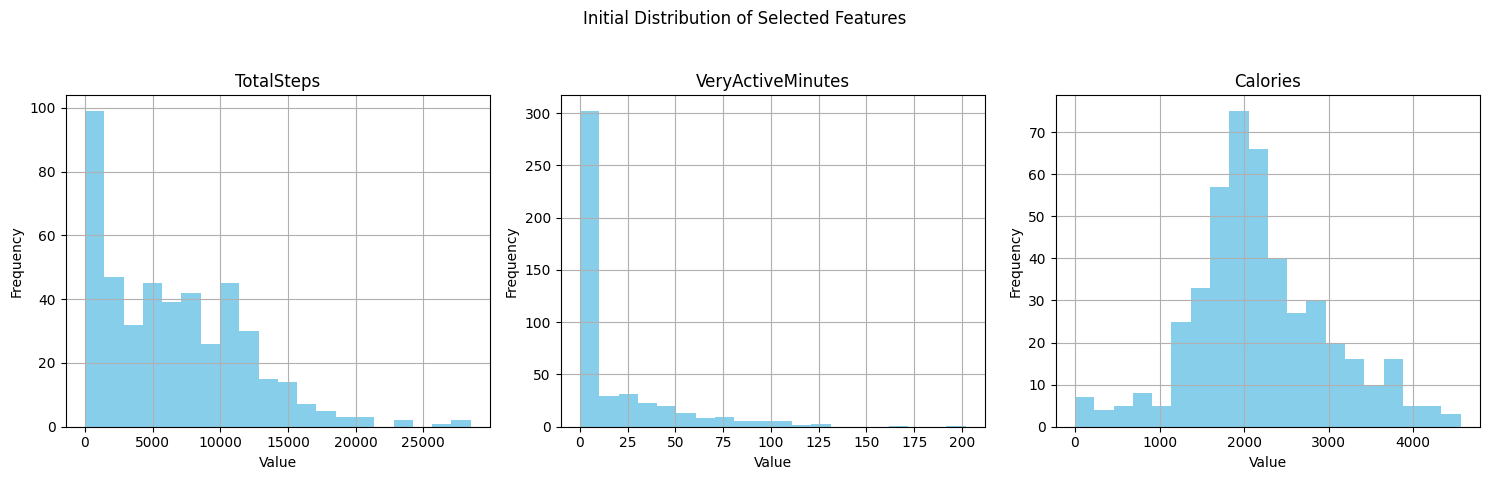

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dailyActivity_merged.csv'  # Update this with the actual path to your dataset
data = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

# Generate histograms for the selected features
features_to_plot = ['TotalSteps', 'VeryActiveMinutes', 'Calories']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Initial Distribution of Selected Features')

for i, feature in enumerate(features_to_plot):
    data[feature].hist(ax=axes[i], bins=20, color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


The histograms above display the initial distributions for TotalSteps, VeryActiveMinutes, and Calories. These visuals are helpful for understanding the range and spread of these key features:

**TotalSteps**: The distribution is slightly skewed to the right, indicating that most days have a moderate number of steps, but there are days with very high step counts.

**VeryActiveMinutes**: This feature is heavily skewed right, showing that most days have few very active minutes, with only occasional days having a higher amount.

**Calories**: Shows a fairly normal distribution centered around 2000 calories, with some variability.

# Step3: Feature Importance Analysis

Now that you've visualized the histogram distributions for key features, Let's move forward with the Feature Importance Analysis. This analysis will help us understand which features have the most impact on the target variable, Calories, which in turn will guide our choices for features to manipulate through the interactive dashboard.

To perform the feature importance analysis, used a tree-based model like Random Forest, which provides good interpretability for feature importance as part of its output.

3.1 **Prepare Data for Modeling**
First, let's prepare the data for the modeling. This typically involves separating the features (X) from the target (y), which is Calories in this case.

3.2 **Train a Random Forest Model**
We will train a Random Forest model and examine the feature importances generated by the model.


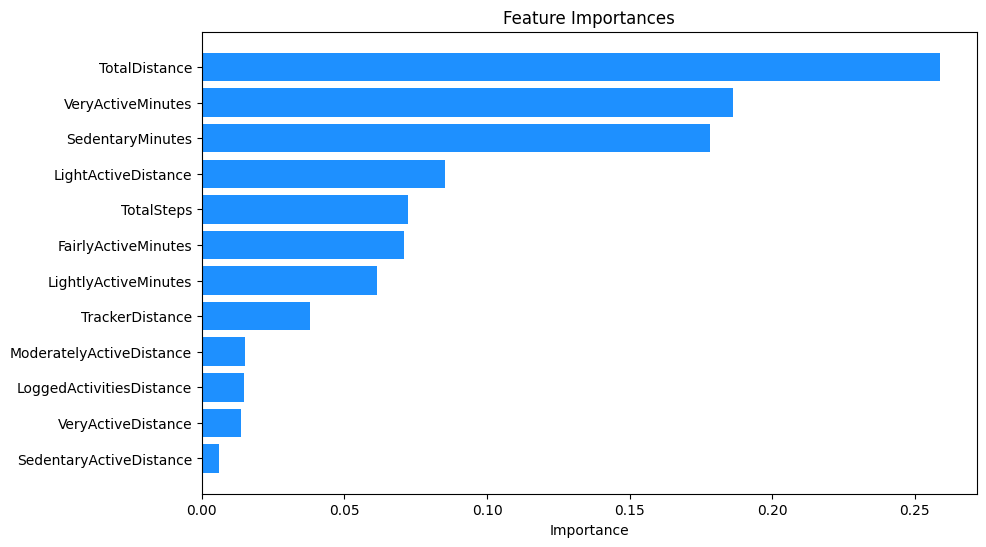

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare data for modeling
X = data.drop(['Calories', 'Id', 'ActivityDate'], axis=1)  # Drop non-feature columns
y = data['Calories']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Visualize feature importances
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(importances['Feature'], importances['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


# UpSample and DownSample

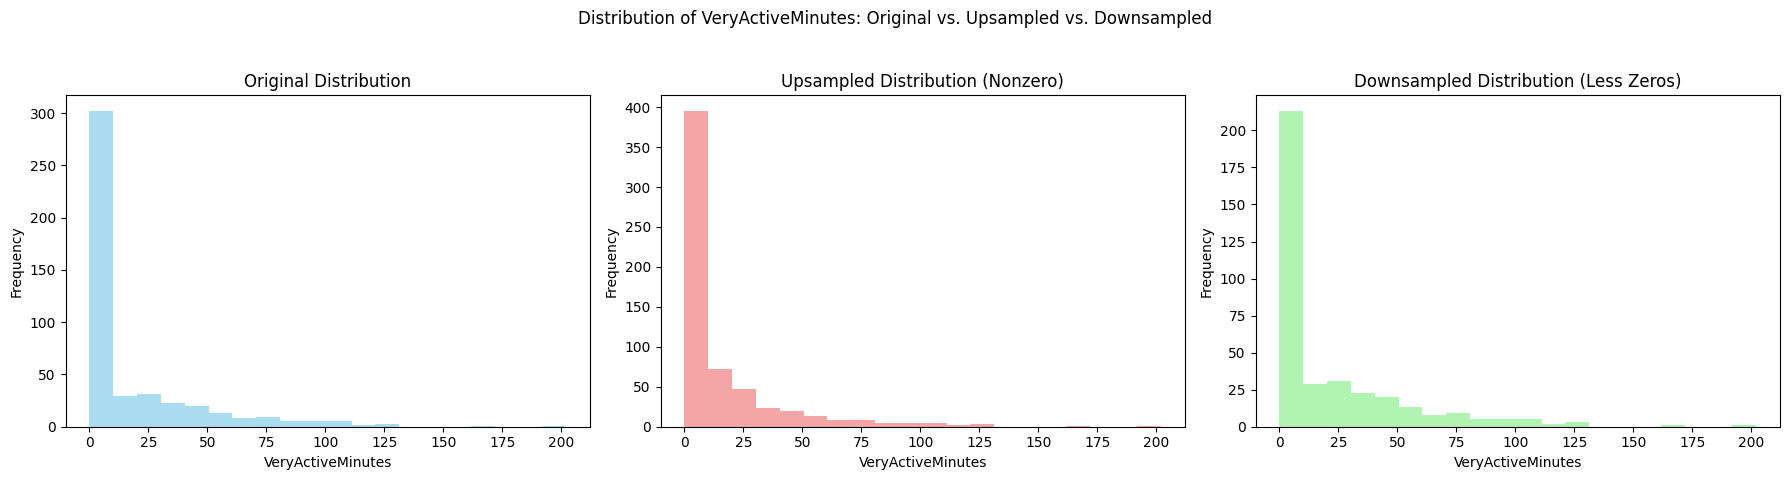

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Mount Google Drive (if file is in Google Drive)
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset (replace with correct path if needed)
file_path = "/content/dailyActivity_merged.csv"  # Update this if needed
data = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"])

# Select the feature for modification
feature = "VeryActiveMinutes"

# ---------------- UPSAMPLING NONZERO LOW VALUES ----------------
# Select only nonzero values
nonzero_values = data[data[feature] > 0]

# Select lower 50% of nonzero values for upsampling
lower_half_nonzero = nonzero_values[nonzero_values[feature] <= nonzero_values[feature].median()]

# Ensure we have enough samples for upsampling
if len(lower_half_nonzero) > 0:
    upsampled_nonzero = resample(
        lower_half_nonzero, replace=True, n_samples=min(len(data) // 3, len(lower_half_nonzero) * 2), random_state=42
    )
    upsampled_data = pd.concat([data, upsampled_nonzero])
else:
    upsampled_data = data.copy()  # No upsampling possible

# ---------------- DOWNSAMPLING EXCESSIVE ZEROS ----------------
# Identify excessive zero values
zero_activity = data[data[feature] == 0]

# Downsample the zero values
if len(zero_activity) > 0:
    downsampled_zero = resample(
        zero_activity, replace=False, n_samples=min(len(data) // 3, len(zero_activity)), random_state=42
    )
    downsampled_data = pd.concat([data[data[feature] > 0], downsampled_zero])
else:
    downsampled_data = data.copy()  # No downsampling possible

# ---------------- PLOTTING THE DISTRIBUTIONS ----------------
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle("Distribution of VeryActiveMinutes: Original vs. Upsampled vs. Downsampled")

# Original Distribution
axes[0].hist(data[feature], bins=20, color="skyblue", alpha=0.7)
axes[0].set_title("Original Distribution")
axes[0].set_xlabel(feature)
axes[0].set_ylabel("Frequency")

# Upsampled Distribution
axes[1].hist(upsampled_data[feature], bins=20, color="lightcoral", alpha=0.7)
axes[1].set_title("Upsampled Distribution (Nonzero)")
axes[1].set_xlabel(feature)
axes[1].set_ylabel("Frequency")

# Downsampled Distribution
axes[2].hist(downsampled_data[feature], bins=20, color="lightgreen", alpha=0.7)
axes[2].set_title("Downsampled Distribution (Less Zeros)")
axes[2].set_xlabel(feature)
axes[2].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Implement the Muller Loop with Model Training

📌 Step 1: What is the Muller Loop?
The Muller Loop is a systematic way to:

Train multiple models (XGBoost, MLP, RandomForest, SVM).
Evaluate performance using F1-score (for classification) or R² (for regression).
Store results for comparison.

📌 Step 2: Implementation Plan

✅ Train a baseline model using multiple classifiers:

* XGBoost
* Multi-Layer Perceptron (MLP)
* Random Forest (RF)
* Support Vector Machine (SVM)

✅ Use the original dataset (before modifying distribution).

✅ Evaluate models using F1-score (for classification).

✅ Store and compare results.

Training RandomForest...
RandomForest - F1 Score: 0.5175
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:15:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - F1 Score: 0.5132
Training SVM...
SVM - F1 Score: 0.5340
Training MLP...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MLP - F1 Score: 0.3801

Model Performance:

RandomForest - F1 Score: 0.5175

XGBoost - F1 Score: 0.5132

SVM - F1 Score: 0.5340

MLP - F1 Score: 0.3801


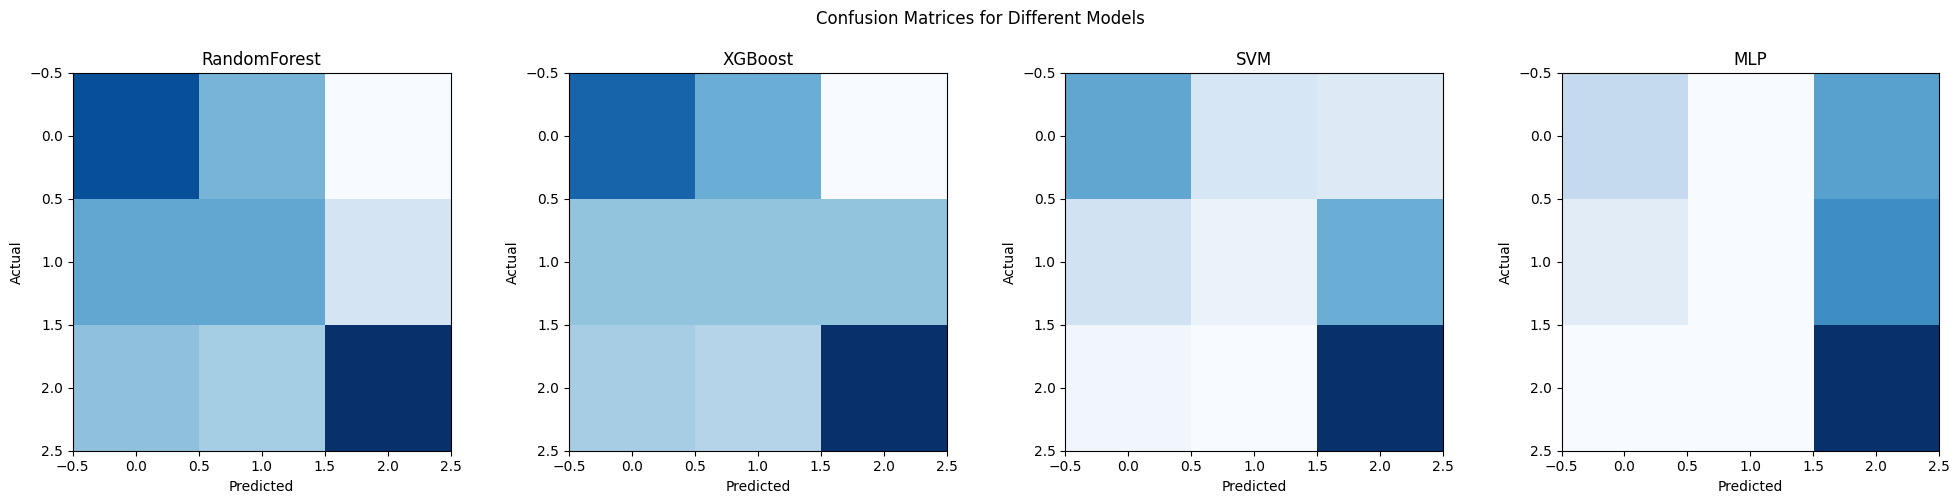

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Load the dataset
file_path = "/content/dailyActivity_merged.csv"  # Update this if needed
data = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"])

# ---------------- SET TARGET VARIABLE (Calories Categorization) ----------------
# Convert Calories into Low, Medium, High categories
data["TargetClass"] = pd.qcut(data["Calories"], q=3, labels=[0, 1, 2])  # Low, Medium, High

# Ensure target is categorical
data["TargetClass"] = data["TargetClass"].astype("category").cat.codes

# ---------------- DEFINE FEATURES & TARGET ----------------
feature_cols = ["TotalSteps", "VeryActiveMinutes"]  # Keep important features
target_col = "TargetClass"

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

# ---------------- DEFINE MODELS FOR MULLER LOOP ----------------
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel="rbf", probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Store results
model_results = {}

# ---------------- TRAIN MODELS IN MULLER LOOP ----------------
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    model_results[name] = {
        "F1-score": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{name} - F1 Score: {f1:.4f}")

# ---------------- DISPLAY RESULTS ----------------
print("\nModel Performance:")
for name, result in model_results.items():
    print(f"\n{name} - F1 Score: {result['F1-score']:.4f}")

# ---------------- PLOT CONFUSION MATRICES ----------------
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Confusion Matrices for Different Models")

for i, (name, result) in enumerate(model_results.items()):
    ax = axes[i]
    cm = result["Confusion Matrix"]
    ax.imshow(cm, cmap="Blues")
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Best Model:

**SVM (F1-score = 0.5340)** performed the best among the four models.

**RandomForest (0.5175) and XGBoost (0.5132)** followed closely.

**MLP (0.3801)** performed the worst, which is expected because neural networks often need more data and hyperparameter tuning.

# Muller Loop - Class Distribution Check

Class distribution in y_train:
TargetClass
1    126
0    123
2    116
Name: count, dtype: int64

Class distribution in y_test:
TargetClass
2    36
0    29
1    27
Name: count, dtype: int64
Training RandomForest...
RandomForest - F1 Score: 0.5175
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:15:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - F1 Score: 0.5132
Training SVM...
SVM - F1 Score: 0.5340
Training MLP...
MLP - F1 Score: 0.3801

Model Performance:

RandomForest - F1 Score: 0.5175

XGBoost - F1 Score: 0.5132

SVM - F1 Score: 0.5340

MLP - F1 Score: 0.3801


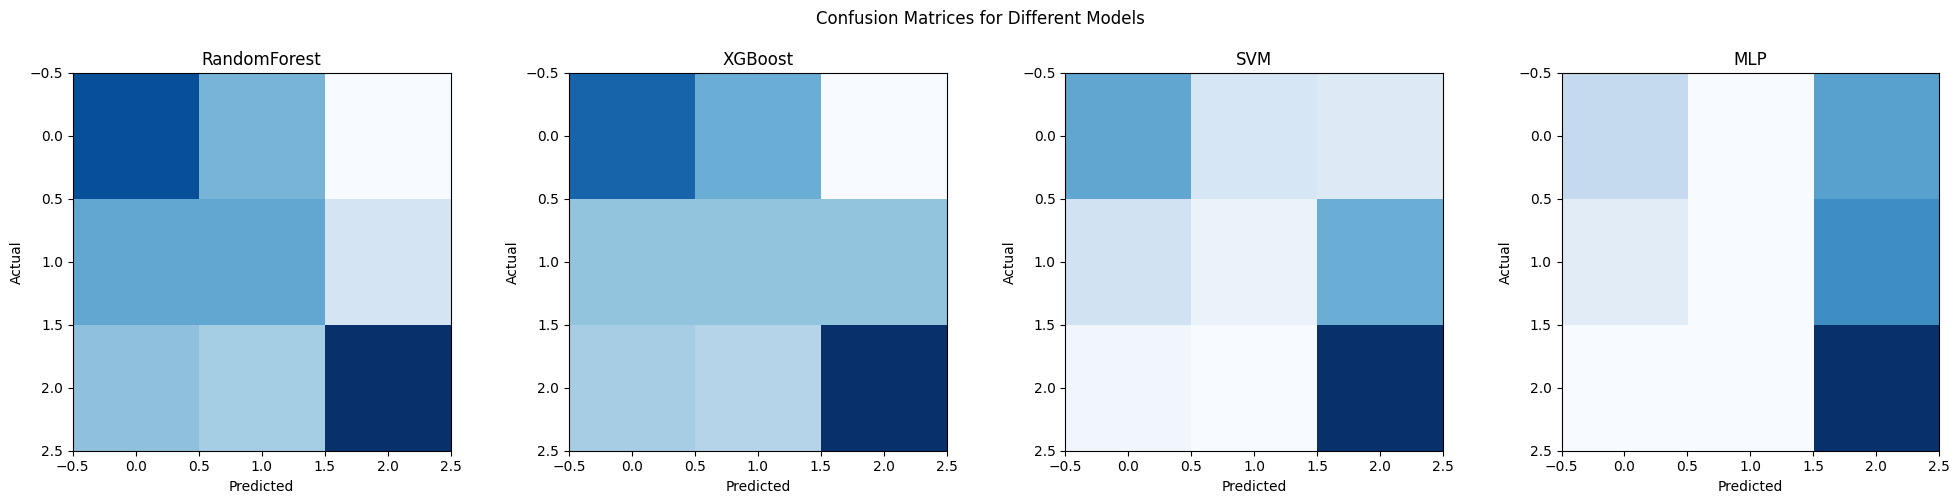

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Load the dataset
file_path = "/content/dailyActivity_merged.csv"  # Update if needed
data = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"])

# ---------------- SET TARGET VARIABLE (Calories Categorization) ----------------
# Convert Calories into Low, Medium, High categories
data["TargetClass"] = pd.qcut(data["Calories"], q=3, labels=[0, 1, 2])  # Low, Medium, High

# Ensure target is categorical
data["TargetClass"] = data["TargetClass"].astype("category").cat.codes

# ---------------- DEFINE FEATURES & TARGET ----------------
feature_cols = ["TotalSteps", "VeryActiveMinutes"]  # Keep important features
target_col = "TargetClass"

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

# ---------------- CHECK CLASS DISTRIBUTION ----------------
print("Class distribution in y_train:")
print(y_train.value_counts())

print("\nClass distribution in y_test:")
print(y_test.value_counts())

# ---------------- DEFINE MODELS FOR MULLER LOOP ----------------
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel="rbf", probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Store results
model_results = {}

# ---------------- TRAIN MODELS IN MULLER LOOP ----------------
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Modify classification report to avoid warnings
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    # Store results
    model_results[name] = {
        "F1-score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }

    print(f"{name} - F1 Score: {f1:.4f}")

# ---------------- DISPLAY RESULTS ----------------
print("\nModel Performance:")
for name, result in model_results.items():
    print(f"\n{name} - F1 Score: {result['F1-score']:.4f}")

# ---------------- PLOT CONFUSION MATRICES ----------------
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Confusion Matrices for Different Models")

for i, (name, result) in enumerate(model_results.items()):
    ax = axes[i]
    cm = result["Confusion Matrix"]
    ax.imshow(cm, cmap="Blues")
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The class distribution check confirms that the dataset is fairly balanced across the three categories (0 = Low, 1 = Medium, 2 = High Calories).

No major imbalance issue exists, so we don’t need to apply SMOTE upsampling or downsampling for class balance at this stage.

📌 Key Observations

Class Distribution is Balanced

Training Set (y_train):

Class 0: 123 samples

Class 1: 126 samples

Class 2: 116 samples

Test Set (y_test):

Class 0: 29 samples

Class 1: 27 samples

Class 2: 36 samples

✅ No major class imbalance—this is a good sign!

Model Performance

Best model: SVM (F1-score = 0.5340)

Other models performed similarly:

RandomForest (0.5175) and XGBoost (0.5132) were close.

MLP performed the worst (0.3801)—this might need hyperparameter tuning.

📌 Next Steps

Now that we have baseline results, we move to the core part of the assignment:

✅ Modify the feature distribution dynamically (Upsample/Downsample VeryActiveMinutes).

✅ Retrain models using the Muller loop on new distributions.

✅ Compare F1-scores before & after modifying the distribution.

✅ Use an interactive slider to change distribution dynamically.

# Interactive Data Modification + Dynamic Confusion Matrix

In [ ]:
!pip install holoviews hvplot panel --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas
import panel as pn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from io import BytesIO
from PIL import Image

hv.extension("bokeh")
pn.extension()

In [ ]:
# Load dataset
file_path = "/content/dailyActivity_merged.csv"
data = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"])

# Set Features & Target
feature = "VeryActiveMinutes"
target_col = "TargetClass"
data["TargetClass"] = pd.qcut(data["Calories"], q=3, labels=[0, 1, 2])

# Ensure target is categorical
data["TargetClass"] = data["TargetClass"].astype("category").cat.codes

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "SVM": SVC(kernel="rbf", probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# Function to modify data distribution & retrain models
def modify_and_train(slider_value, selected_model):
    global data, models

    modified_data = data.copy()

    if slider_value < 0:  # Downsampling
        zero_activity = data[data[feature] == 0]
        downsampled_zero = resample(zero_activity, replace=False,
                                    n_samples=max(len(data) // (abs(slider_value) + 1), 1),
                                    random_state=42)
        modified_data = pd.concat([data[data[feature] > 0], downsampled_zero])

    elif slider_value > 0:  # Upsampling
        nonzero_values = data[data[feature] > 0]
        lower_half_nonzero = nonzero_values[nonzero_values[feature] <= nonzero_values[feature].median()]

        if len(lower_half_nonzero) > 0:
            upsampled_nonzero = resample(lower_half_nonzero, replace=True,
                                         n_samples=min(len(data) * (slider_value + 1), len(lower_half_nonzero) * 3),
                                         random_state=42)
            modified_data = pd.concat([data, upsampled_nonzero])

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(modified_data[["TotalSteps", "VeryActiveMinutes"]],
                                                        modified_data[target_col],
                                                        test_size=0.2, random_state=42)

    # Train the selected model
    model = models[selected_model]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Create a HoloViews confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns=[f"Predicted {i}" for i in range(cm.shape[1])],
                         index=[f"Actual {i}" for i in range(cm.shape[0])])

    hv_cm = cm_df.hvplot.heatmap(cmap="Blues", rot=45, width=600, height=500,
                                 title=f"Confusion Matrix ({selected_model})",
                                 xlabel="Predicted Label", ylabel="Actual Label", colorbar=True)

    # Display F1 Score & Model Name
    f1_text = pn.pane.Markdown(f"""
    ## Model Performance
    **Selected Model:** <span style='color:#2980B9'>{selected_model}</span>
    **F1-Score:** <span style='color:#27AE60'>{f1:.4f}</span>
    """, styles={'color': '#34495E', 'font-size': '16px'})

    return pn.Row(hv_cm, f1_text)  # **Only HoloViews, NO Matplotlib!**

# ---------- UI IMPROVEMENTS ----------
# **Header Section**
header = pn.pane.Markdown("""
# ML Mavericks Dashboard
## Dynamic Confusion Matrix & Data Distribution
This dashboard allows you to modify data distribution dynamically, retrain models,
and view real-time confusion matrix & F1 Score.
""", styles={'text-align': 'center', 'color': '#2C3E50', 'font-size': '20px', 'font-weight': 'bold'})

# **Fixed Sidebar Layout**
sidebar = pn.WidgetBox(
    pn.pane.Markdown("### Adjust Parameters", styles={'color': '#1F618D', 'font-size': '16px'}),
    pn.widgets.IntSlider(name="Modify Data Distribution", start=-3, end=3, step=1, value=0, width=250),
    pn.widgets.Select(name="Select Model", options=list(models.keys()), width=250),
    width=300,
    styles={
        'background': '#ECF0F1',
        'padding': '15px',
        'border-radius': '8px',
        'box-shadow': '2px 2px 10px #BDC3C7',
        'margin': '10px'
    }
)

# **Main Content Area**
main_content = pn.Column(
    pn.pane.Markdown("## Confusion Matrix & Model Performance", styles={'color': '#8E44AD', 'font-size': '18px', 'font-weight': 'bold'}),
    pn.Row(
        pn.Spacer(width=30),
        pn.Column(pn.bind(modify_and_train, sidebar[1], sidebar[2]), width=700),
        pn.Spacer(width=30)
    )
)

# **Full Dashboard Layout**
dashboard = pn.Row(
    pn.Spacer(width=30),
    sidebar,
    pn.Spacer(width=30),
    pn.Column(header, main_content),
    pn.Spacer(width=30)
)

# Show Dashboard
dashboard.servable()


Row
    [0] Spacer(width=30)
    [1] WidgetBox(styles={'background': '#ECF0F1', ...}, width=300)
        [0] Markdown(str, styles={'color': '#1F618D', ...})
        [1] IntSlider(end=3, name='Modify Data D..., start=-3, width=250)
        [2] Select(options=['RandomForest', ...], value='RandomForest', width=250)
    [2] Spacer(width=30)
    [3] Column
        [0] Markdown(str, styles={'text-align': 'center', ...})
        [1] Column
            [0] Markdown(str, styles={'color': '#8E44AD', ...})
            [1] Row
                [0] Spacer(width=30)
                [1] Column(width=700)
                    [0] ParamFunction(function, _pane=Row, defer_load=False)
                [2] Spacer(width=30)
    [4] Spacer(width=30)